In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import altair as alt
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## File Import

In [2]:
df = pd.read_csv("../data_input/feed_v1.csv", index_col = None)
df = df.drop(columns = 'Unnamed: 0')
df

,Ts,t,HF,Weight,Tr,sheet_name,compound,exp_no
0,40.1741,0,0.483698,100.0000,25.0000,I1-30-1,05-85,3
1,40.1511,1,0.447084,99.9913,25.1667,I1-30-1,05-85,3
2,40.1566,2,0.428202,99.9864,25.3333,I1-30-1,05-85,3
3,40.1877,3,0.414622,99.9841,25.5000,I1-30-1,05-85,3
4,40.2206,4,0.383961,99.9881,25.6667,I1-30-1,05-85,3
...,...,...,...,...,...,...,...,...
41854,506.0690,4646,249.412000,35.8362,500.0000,DAO (1),DAO,1
41855,506.0730,4647,249.411000,35.8377,500.0000,DAO (1),DAO,1
41856,506.0740,4648,249.409000,35.8393,500.0000,DAO (1),DAO,1
41857,506.0710,4649,249.408000,35.8409,500.0000,DAO (1),DAO,1


In [4]:
df.groupby(['compound', 'exp_no']).agg('count').reset_index()

,compound,exp_no,Ts,t,HF,Weight,Tr,sheet_name
0,05-85,1,4651,4651,4651,4651,4651,4651
1,05-85,2,4651,4651,4651,4651,4651,4651
2,05-85,3,4651,4651,4651,4651,4651,4651
3,1-8,1,4651,4651,4651,4651,4651,4651
4,1-8,2,4651,4651,4651,4651,4651,4651
5,1-8,3,4651,4651,4651,4651,4651,4651
6,DAO,1,4651,4651,4651,4651,4651,4651
7,DAO,2,4651,4651,4651,4651,4651,4651
8,DAO,3,4651,4651,4651,4651,4651,4651


In [5]:
df.compound.value_counts()

05-85    13953
DAO      13953
1-8      13953
Name: compound, dtype: int64

In [6]:
def test_train_compound(df, product):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        product : tbbpa, caoh2, both
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
    df = df.query('compound == @product')
    
    X_train = df.query('exp_no == 1')[["Ts", 't', 'HF', 'Tr']]
    y_train = df.query('exp_no == 1')["Weight"]
    
    X_test = df.query('exp_no != 1')[["Ts", 't', 'HF', 'Tr']]
    y_test = df.query('exp_no != 1')["Weight"]
    
    return X_train, X_test, y_train, y_test

In [7]:
df_results = pd.DataFrame({'Model': [],
                           'Compound' : [],
                           'Train Accuracy': [],
                           'Test Accuracy' : []
                           })
df_results

,Model,Compound,Train Accuracy,Test Accuracy


## Summary

In [22]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,05-85,0.950985,0.945246
NaN,Linear Regression,DAO,0.943727,0.941294
NaN,Linear Regression,1-8,0.952289,0.939150
NaN,Partial Least Squares (n=2),05-85,0.897625,0.896566
NaN,Partial Least Squares (n=2),DAO,0.896688,0.893820
NaN,Partial Least Squares (n=2),1-8,0.898955,0.893608
NaN,Partial Least Squares (n=3),05-85,0.945414,0.940529
NaN,Partial Least Squares (n=3),DAO,0.941710,0.937637
NaN,Partial Least Squares (n=3),1-8,0.947394,0.935019
NaN,Random Forest Regression (max_depth = 2),05-85,0.993956,0.993200


## Linear Modelling

In [9]:
def linear_model(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train.ravel())
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = lr.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_lr_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Linear Regression',
                           'Train Accuracy': lr.score(X_train, y_train),
                           'Test Accuracy' : lr.score(X_test, y_test),
                           'Compound' : product}, index = [None])
    
for i in df.compound.value_counts().index:
    df_results = df_results.append(linear_model(df, i))
    

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9509854105205595
The testing accuracy for the model is  0.9452456295426753
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9437266072071955
The testing accuracy for the model is  0.941294033000011
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9522890507369324
The testing accuracy for the model is  0.9391502789113803


## PLSR

In [10]:
def pls2(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls2 = PLSRegression(n_components=2).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls2.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_plsr2_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", pls2.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls2.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=2)',
                           'Train Accuracy': pls2.score(X_train, y_train),
                           'Test Accuracy' : pls2.score(X_test, y_test),
                           'Compound' : i}, index = [None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(pls2(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.897624850458334
The testing accuracy for the model is  0.8965664592315972
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.8966882258663454
The testing accuracy for the model is  0.8938196445806033
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.8989546769327665
The testing accuracy for the model is  0.893608131828073


In [11]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,05-85,0.950985,0.945246
NaN,Linear Regression,DAO,0.943727,0.941294
NaN,Linear Regression,1-8,0.952289,0.939150
NaN,Partial Least Squares (n=2),05-85,0.897625,0.896566
NaN,Partial Least Squares (n=2),DAO,0.896688,0.893820
NaN,Partial Least Squares (n=2),1-8,0.898955,0.893608


In [12]:
def pls3(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls3 = PLSRegression(n_components=3).fit(X_train, y_train)
    print("The training accuracy for the model is ", pls3.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls3.score(X_test, y_test))
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls3.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_plsr3_{}.csv'.format(product))
    
    return pd.DataFrame({'Model': 'Partial Least Squares (n=3)',
                           'Train Accuracy': pls3.score(X_train, y_train),
                           'Test Accuracy' : pls3.score(X_test, y_test),
                           'Compound' : i}, index = [None])
for i in df.compound.value_counts().index:
    df_results = df_results.append(pls3(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9454136446625216
The testing accuracy for the model is  0.9405289396157371
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.941709662600088
The testing accuracy for the model is  0.9376368744320458
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9473938460117876
The testing accuracy for the model is  0.9350188824596474


## Random forest

In [13]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf2 = RandomForestRegressor(random_state=0, max_depth = 2).fit(X_train, y_train)
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf2.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_rf2_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", rf2.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf2.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 2)',
                           'Train Accuracy': rf2.score(X_train, y_train),
                           'Test Accuracy' : rf2.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9939555407939203
The testing accuracy for the model is  0.9931999748094839
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9934894769388167
The testing accuracy for the model is  0.9934493177220803
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9936269775659561
The testing accuracy for the model is  0.9937588942546836


In [14]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf5 = RandomForestRegressor(random_state=0, max_depth = 5).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf5.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_rf5_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf5.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf5.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 5)',
                           'Train Accuracy': rf5.score(X_train, y_train),
                           'Test Accuracy' : rf5.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999714059303267
The testing accuracy for the model is  0.9987709878854714
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999666070124911
The testing accuracy for the model is  0.9982830368245057
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999728028178828
The testing accuracy for the model is  0.9991270782605451


In [15]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf7 = RandomForestRegressor(random_state=0, max_depth = 7).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf7.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_rf7_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf7.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf7.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 7)',
                           'Train Accuracy': rf7.score(X_train, y_train),
                           'Test Accuracy' : rf7.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999992555816665
The testing accuracy for the model is  0.9988159957829839
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999995389464218
The testing accuracy for the model is  0.998349330690369
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999993496866786
The testing accuracy for the model is  0.9992049700797399


In [16]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf10 = RandomForestRegressor(random_state=0, max_depth = 10).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf10.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_rf10_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf10.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf10.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 10)',
                           'Train Accuracy': rf10.score(X_train, y_train),
                           'Test Accuracy' : rf10.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999999237939788
The testing accuracy for the model is  0.998794389142739
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999999446386025
The testing accuracy for the model is  0.9984558784885881
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999999099010285
The testing accuracy for the model is  0.9992413654268799


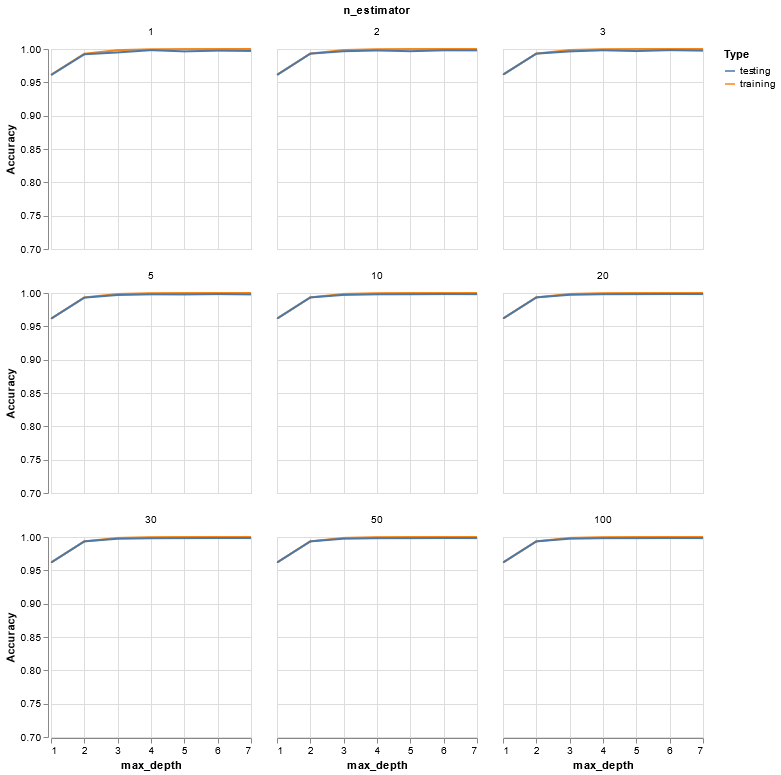

In [18]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(1,8)
X_train, X_test, y_train, y_test = test_train_compound(df, "DAO")
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        rf = RandomForestRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(rf.score(X_train, y_train))
        test_acc.append(rf.score(X_test, y_test))
        #print(j,i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_rf
alt.Chart(df_rf).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.7, 1])),
    alt.Color('Type'),
    alt.Facet('n_estimator')
    ).properties(width = 200, height = 200, columns = 3)

## SVR

In [19]:
def svr_rbf(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = svr_rbf.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_svr_rbf_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'SVR RBF Kernel',
                           'Train Accuracy': svr_rbf.score(X_train, y_train),
                           'Test Accuracy' : svr_rbf.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(svr_rbf(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9536628456308468
The testing accuracy for the model is  0.9534835718089936
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9558466539412058
The testing accuracy for the model is  0.9511546122718119
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9556195876799508
The testing accuracy for the model is  0.9525255194986885


## GBR

In [20]:
def gbr(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    gbr = GradientBoostingRegressor().fit(X_train,y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = gbr.predict(X_test)
    df_pred.to_csv(r'../output/scenario4/prediction_gbr_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", gbr.score(X_train, y_train))
    print("The testing accuracy for the model is ", gbr.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Train Accuracy': gbr.score(X_train, y_train),
                           'Test Accuracy' : gbr.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(gbr(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999950332330306
The testing accuracy for the model is  0.9989511850189551
The 4 matrices for -- DAO -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.9999949317072677
The testing accuracy for the model is  0.998348152402218
The 4 matrices for -- 1-8 -- are of sizes:  (4651, 4) (9302, 4) (4651,) (9302,)
The training accuracy for the model is  0.999994880174638
The testing accuracy for the model is  0.99927579250948


In [21]:
df_results.to_csv('../output/scenario4/results_table.csv')